In [1]:


import numpy as np 
import pandas as pd 


import os 
for dirname, _, filenames in os.walk('/kaggle/input'):  
    for filename in filenames:  
        print(os.path.join(dirname, filename))  
import seaborn as sns   
import matplotlib.pyplot as plt 
 
 

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


# Exploratory Data Analysis (EDA)

This notebook provides an exploratory data analysis of the **Kaggle Playground Series - Season 5 Episode 12** dataset.  
The goal is to understand the distribution of features, detect relationships, compare groups, and extract insights that will guide future modeling steps.

#  Loading Raw Data
We load the training data and get an initial overview using `head()`, `describe()`, and missing values checking.

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s5e12/train.csv') 

In [3]:
train.head(5)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [4]:
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


#  checking  missing  values
The dataset contains **no missing values**, which simplifies preprocessing.



In [5]:
train.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


# Exploratory Data Analysis (EDA): Global Distributions

<Axes: >

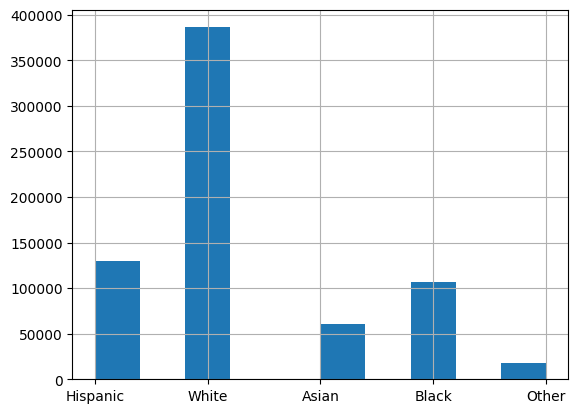

In [6]:
train['ethnicity'].hist()

# 4. Ethnicity vs Diabetes
We examine how diabetes prevalence varies across ethnic groups.

In [7]:
train.groupby(["ethnicity", "diagnosed_diabetes"])['id'].count()

ethnicity  diagnosed_diabetes
Asian      0.0                    22335
           1.0                    37785
Black      0.0                    39982
           1.0                    66319
Hispanic   0.0                    49873
           1.0                    80111
Other      0.0                     6350
           1.0                    11092
White      0.0                   145153
           1.0                   241000
Name: id, dtype: int64

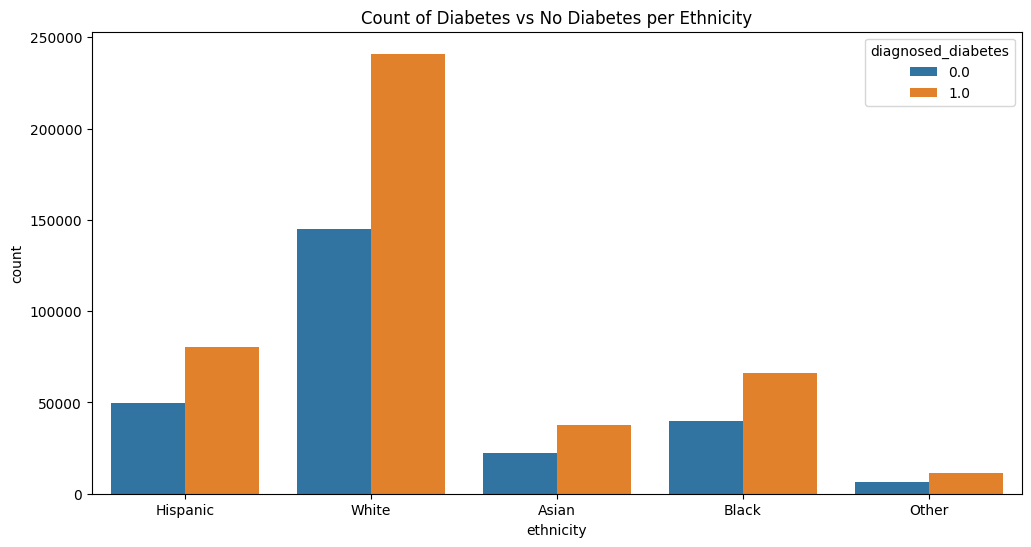

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=train,
    x="ethnicity",
    hue="diagnosed_diabetes"
)
plt.title("Count of Diabetes vs No Diabetes per Ethnicity")
plt.show()


The distribution of the numerical features appears approximately symmetric.

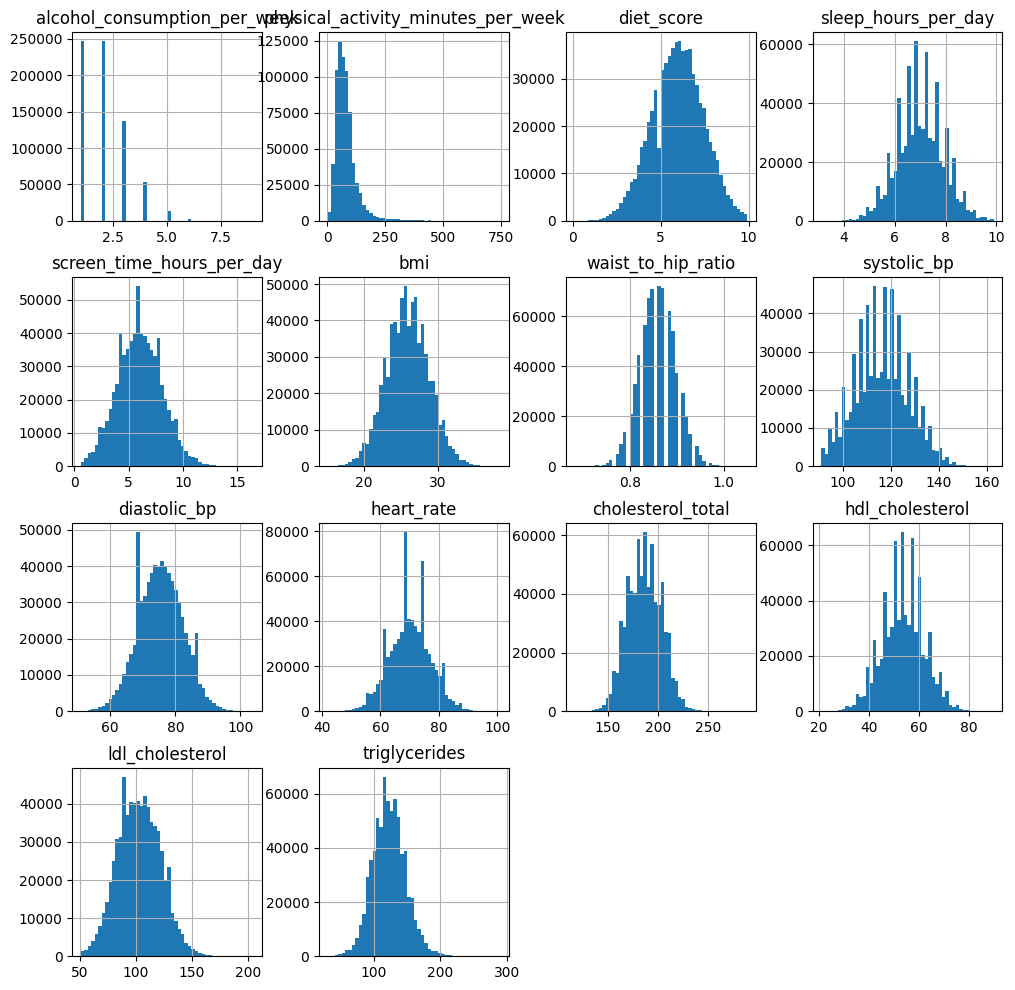

In [9]:
train.drop(['id','age','diagnosed_diabetes','cardiovascular_history','hypertension_history','family_history_diabetes'],axis=1).hist(bins=50,figsize=(12,12))
plt.show()

# 5. Physical Activity vs Diabetes
People with diabetes tend to have lower physical activity levels

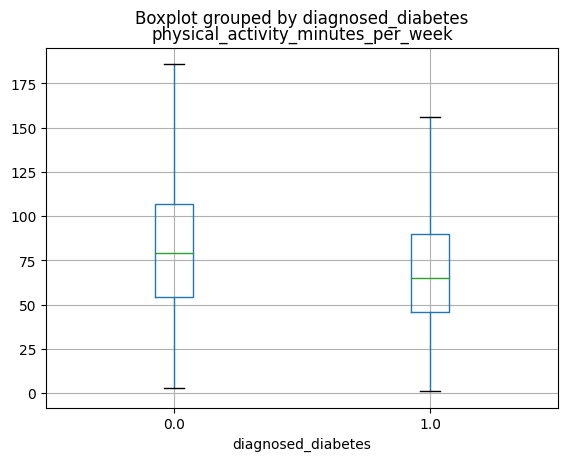

In [10]:
train.boxplot(column='physical_activity_minutes_per_week' , by='diagnosed_diabetes',showfliers=False)
plt.show()


# 6. Diet Score vs Diabete
People diagnosed with diabetes tend to have a lower median diet_score.

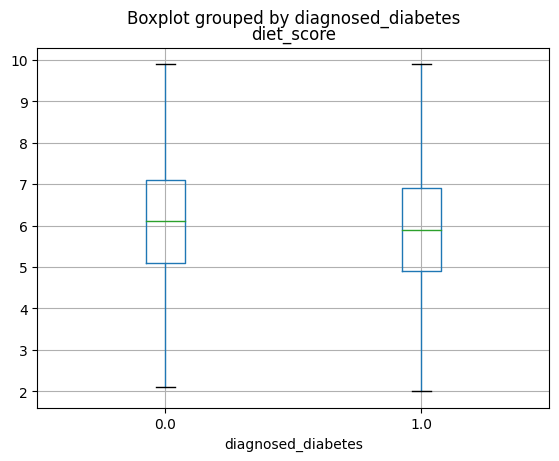

In [11]:

train.boxplot(column='diet_score',  by='diagnosed_diabetes',showfliers=False)
plt.show()


# 7.  Age vs Diabetes
Older individuals show **higher diabetes prevalence**, confirming medical expectations.


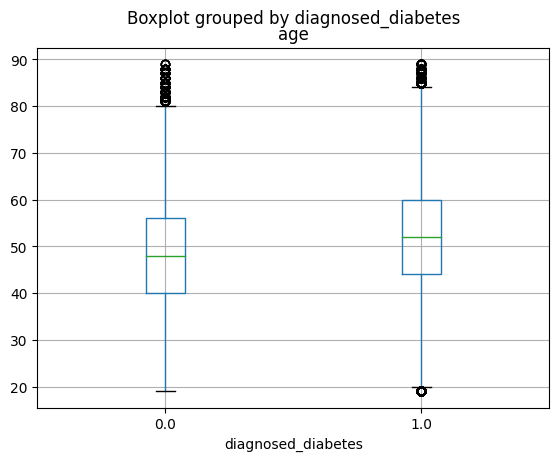

In [12]:

train.boxplot(column ='age',by='diagnosed_diabetes')
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Current'), Text(1, 0, 'Never'), Text(2, 0, 'Former')])

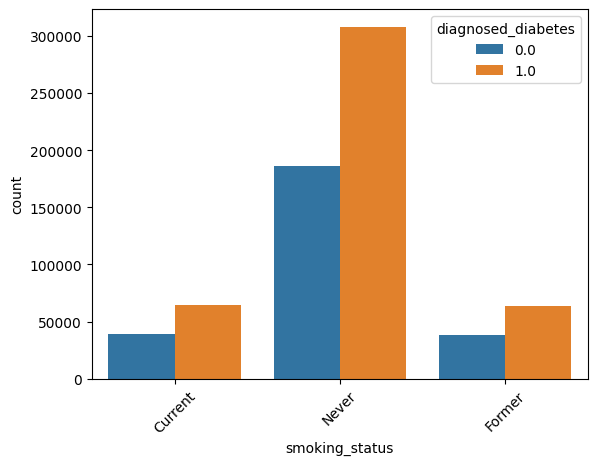

In [13]:
sns.countplot(x='smoking_status', hue='diagnosed_diabetes', data=train)
plt.xticks(rotation=45)


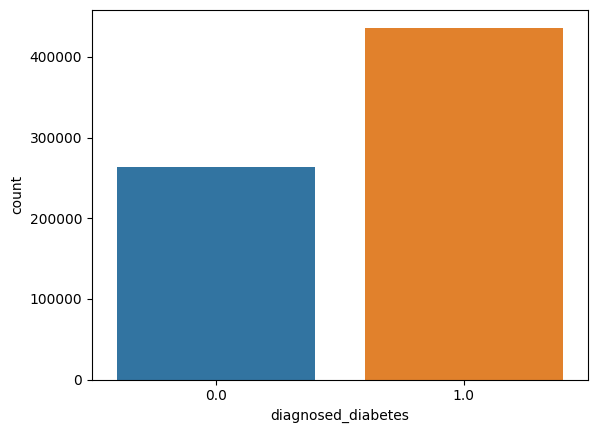

In [14]:
sns.countplot(x='diagnosed_diabetes', data=train)
plt.show()


# proportion disgnosed diabetes 

in person that has family history diabetes

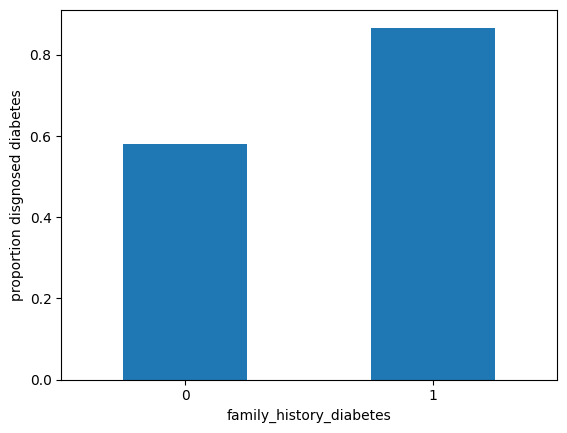

In [15]:
prop=train.groupby('family_history_diabetes')['diagnosed_diabetes'].mean()
prop.plot(kind='bar')
plt.ylabel('proportion disgnosed diabetes')
plt.xticks(rotation=0)
plt.show()

in person how have cardio vascular history 

<function matplotlib.pyplot.show(close=None, block=None)>

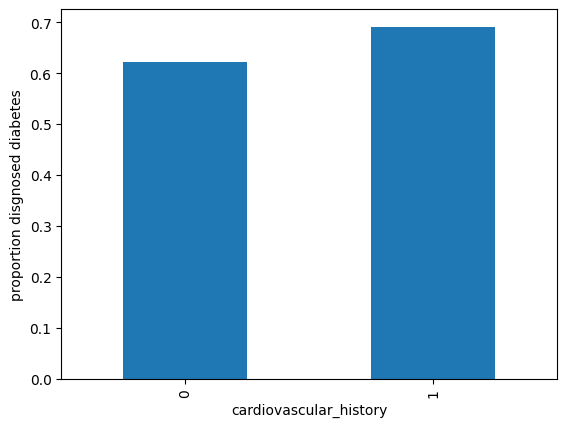

In [16]:
prob2 = train.groupby('cardiovascular_history')['diagnosed_diabetes'].mean()
prob2.plot(kind='bar')
plt.ylabel('proportion disgnosed diabetes')
plt.show

In [17]:
from pandas.plotting import scatter_matrix
corr_matrix=train.select_dtypes(include='number').corr()


In [18]:
pd.cut(train['age'],bins=[18,20,40,60])

0         (20, 40]
1         (40, 60]
2         (20, 40]
3         (40, 60]
4         (40, 60]
            ...   
699995    (20, 40]
699996    (40, 60]
699997    (20, 40]
699998    (40, 60]
699999    (40, 60]
Name: age, Length: 700000, dtype: category
Categories (3, interval[int64, right]): [(18, 20] < (20, 40] < (40, 60]]

# 8.  Correlation Matrix

The heatmap below highlights important linear relationships between numerical features.  
Notably:
- **cholesterol_total** and **ldl_cholesterol** are highly correlated  
- **BMI** is correlated with **waist_to_hip_ratio**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


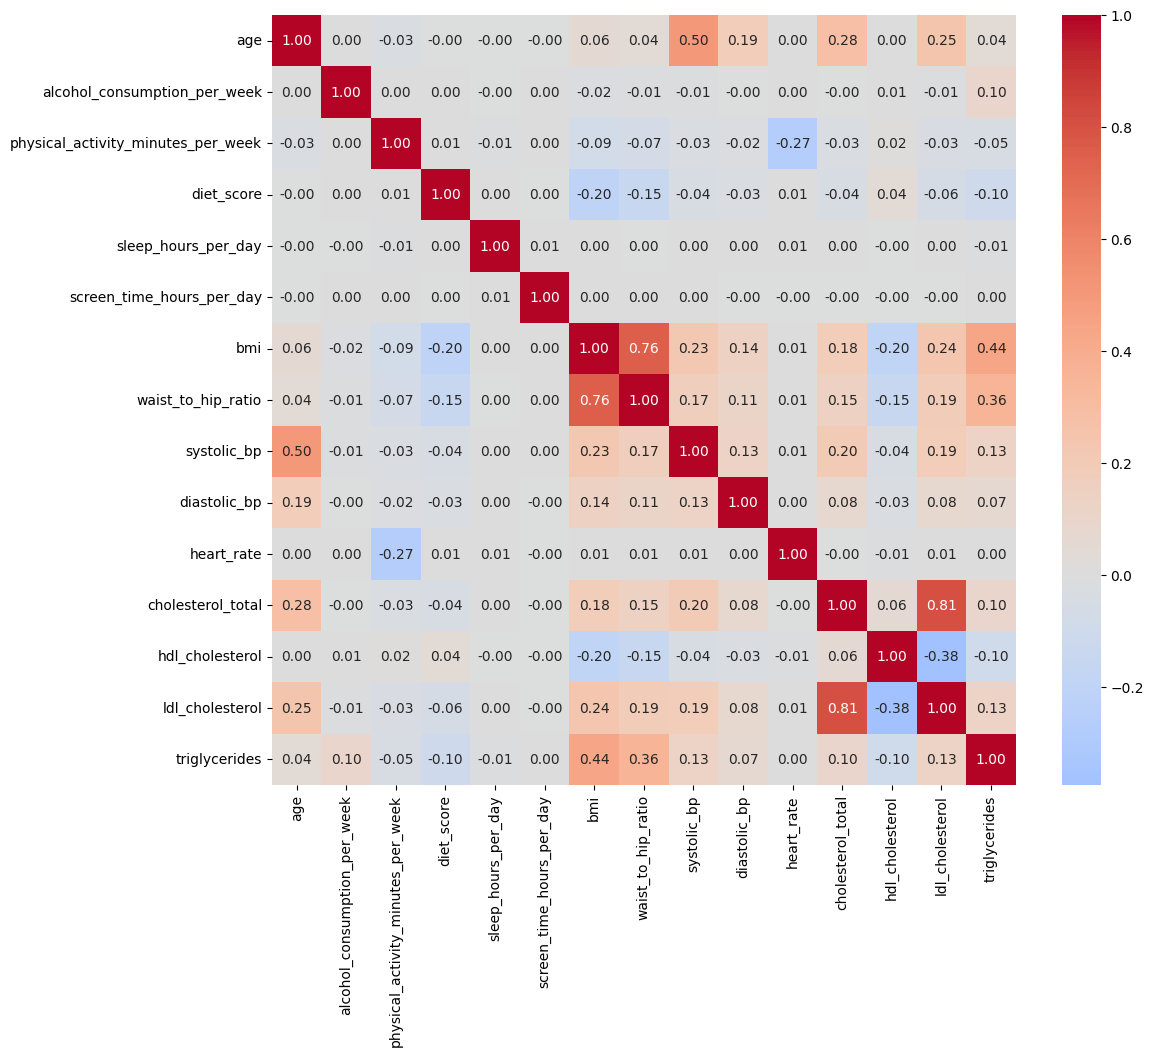

In [19]:
plt.figure(figsize=(12,10))
numeric = train.select_dtypes(include="number").drop(['id','diagnosed_diabetes','cardiovascular_history','hypertension_history','family_history_diabetes'] , axis=1)
corr = numeric.corr()
sns.heatmap(corr, cmap="coolwarm", center=0,annot=True , fmt='.2f')
plt.show()


cholesterol_total is correlated lineary with  ldl_cholesterol we can do a features merging here 

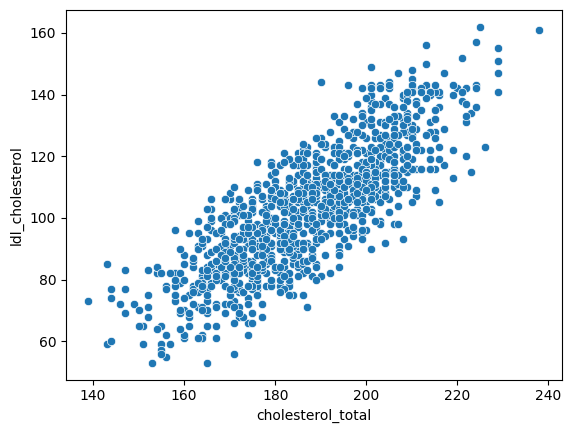

In [20]:
sample = train.sample(1100)
sns.scatterplot(data=sample, x='cholesterol_total', y='ldl_cholesterol')
plt.show()

In [21]:
train.columns 

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

we have also a strong correlation between bmi and waist to hip radio 

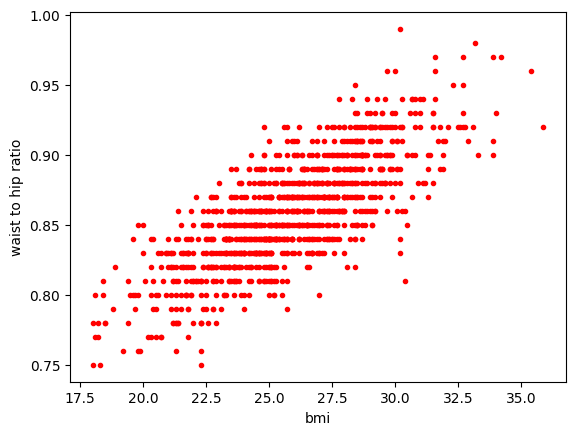

In [22]:
plt.plot(sample['bmi'],sample['waist_to_hip_ratio'],'r.')
plt.xlabel('bmi')
plt.ylabel('waist to hip ratio')
plt.show() 

# 10. Key Insights Summary

- No missing values in the dataset  
- Older individuals have higher diabetes rates  
- Diabetes patients have lower physical activity  
- Diet quality is lower among diabetic individuals  
- Strong cholesterol-related correlations: total ↔ LDL  
- BMI and waist-to-hip ratio show meaningful correlation  
- Several numerical features have symmetric distributions  

